# 1. 준비
## (1) 패키지 import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## (2) 데이터 불러오기

In [3]:
d = pd.read_parquet('005930.parquet')
d

,timestamp,ticker,open,high,low,close,volume
0,20100104,005930,16060.0,16180.0,16000.0,16180.0,11963550.0
1,20100105,005930,16520.0,16580.0,16300.0,16440.0,27960950.0
2,20100106,005930,16580.0,16820.0,16520.0,16820.0,22987750.0
3,20100107,005930,16820.0,16820.0,16260.0,16260.0,22161850.0
4,20100108,005930,16400.0,16420.0,16120.0,16420.0,14789900.0
...,...,...,...,...,...,...,...
3529,20240423,005930,76400.0,76800.0,75500.0,75500.0,18717699.0
3530,20240424,005930,77500.0,78800.0,77200.0,78600.0,22166150.0
3531,20240425,005930,77300.0,77500.0,76300.0,76300.0,15549134.0
3532,20240426,005930,77800.0,77900.0,76500.0,76700.0,12755629.0


## (3) 데이터 준비

In [5]:
d['5d_max'] = d.rolling(5)['close'].max() # 오늘 포함 과거 5일 종가 중 최고값
d['5d_min'] = d.rolling(5)['close'].min() # 오늘 포함 과거 5일 종가 중 최저값
d['last_1d_close'] = d['close'].shift(1) # 전일 종가
d['20d_mean'] = d.rolling(20)['close'].mean() # 20일 이동평균

buy = d[(d['close'] == d['5d_min']) & (d['close'] < d['20d_mean'])]

buy

,timestamp,ticker,open,high,low,close,volume,5d_max,5d_min,last_1d_close,20d_mean
19,20100129,005930,16000.0,16020.0,15600.0,15680.0,22864250.0,16840.0,15680.0,16160.0,16402.0
20,20100201,005930,15680.0,15700.0,15300.0,15540.0,25052100.0,16300.0,15540.0,15680.0,16370.0
21,20100202,005930,15800.0,15800.0,15400.0,15440.0,19690150.0,16160.0,15440.0,15540.0,16320.0
24,20100205,005930,15160.0,15220.0,14940.0,15000.0,25751700.0,15540.0,15000.0,15520.0,16148.0
25,20100208,005930,14940.0,15080.0,14820.0,14960.0,21980400.0,15540.0,14960.0,15000.0,16099.0
...,...,...,...,...,...,...,...,...,...,...,...
3524,20240416,005930,81200.0,81300.0,79400.0,80000.0,31949845.0,84100.0,80000.0,82200.0,81400.0
3525,20240417,005930,80700.0,80800.0,78900.0,78900.0,22611631.0,84100.0,78900.0,80000.0,81705.0
3527,20240419,005930,78300.0,78700.0,76300.0,77600.0,31317563.0,82200.0,77600.0,79600.0,81755.0
3528,20240422,005930,77400.0,77500.0,75100.0,76100.0,30469477.0,80000.0,76100.0,77600.0,81615.0


---
# 2. 진짜 간단한 백테스팅 툴 개발

In [ ]:
holding_cash = 1_000_000 # 보유 현금
position = 0 # 현재 보유 포지션
avg_price = 0 # 평단가
daily_total_value = [] # 일별 총 포트폴리오 가치

for idx,data in d.iterrows():
    daily_total_value.append(0)

    if data['close'] < data['20d_mean'] and position == 0:
        holding_cash -= 1 * data['close']
        position += 1
        avg_price = data['close']
    elif position > 0:
        holding_cash += position * data['close']
        position = 0
        avg_price = 0

    daily_total_value[-1] += holding_cash + position * data['close']


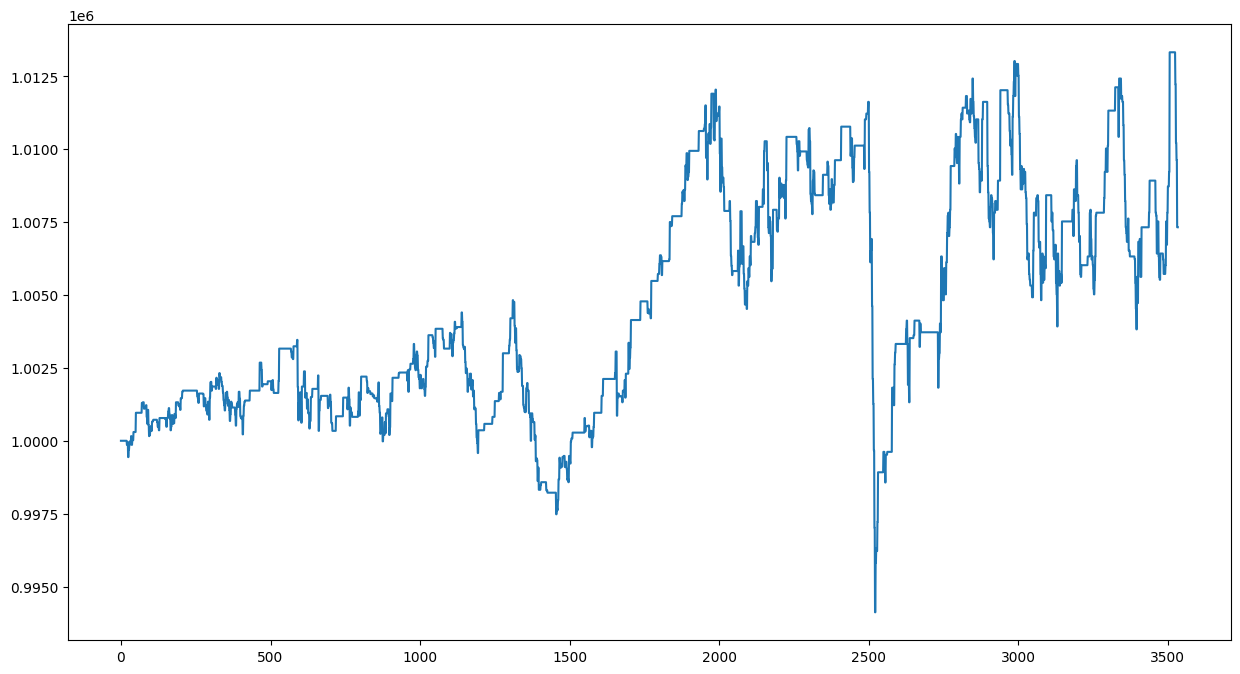

In [7]:
plt.figure(figsize=(15,8))
plt.plot(daily_total_value)